In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import seaborn as sns
import matplotlib
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from pandas.plotting import register_matplotlib_converters

%matplotlib inline
%config InlineBackend.figure_format='retina'

register_matplotlib_converters()
sns.set(style='whitegrid',palette='muted',font_scale=1.5)
rcParams['figure.figsize']=22,10



/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
df=pd.read_excel("fd.xlsx")

In [3]:
df

,Road_Name,Carriageway_Start_Name,Carriageway_End_Name,Description,Direction,Count_Start_Date,Monday_Volume,Tuesday_Volume,Wednesday_Volume,Thursday_Volume,...,Mid_Peak_Volume,Mid_Peak_Hour,PM_Peak_Volume,PM_Peak_Hour,Car,LCV,MCV,HCV-I,HCV-II,HCV Total
0,Access Road #2,NaN,NaN,At Bridge 1020m,Both,2012-05-25,1573.818182,1442.666667,1923.555556,1331.692308,...,145.0,1345.0,198.0,1615.0,0.797000,0.151360,0.038876,0.011031,0.002046,0.051953
1,Kirkbride Road,Westney Rd,End 750 Massey Rd Moble S,!Kirkbride Rd ((Approx 80m east Westney Rd - o...,Both,2012-07-15,15758.545455,14445.333333,19260.444444,13334.153846,...,1154.0,1400.0,1603.0,1700.0,0.793000,0.150842,0.043076,0.008812,0.003941,0.055830
2,COATESVILLE RIVERHEAD HIGHWAY,RIVERHEAD ROAD,STATE HIGHWAY 16,Coatsville-Riverhead Highway 80kph,Both,2012-07-16,4825.090909,4423.000000,5897.333333,4082.769231,...,569.0,1230.0,582.0,1430.0,0.805000,0.153140,0.026518,0.012290,0.003468,0.042277
3,COATESVILLE RIVERHEAD HIGHWAY,STATE HIGHWAY 17,WIDTH CHANGE,C-R H'way 50m S SH17 80kph,Both,2012-07-16,5563.636364,5100.000000,6800.000000,4707.692308,...,578.0,1045.0,629.0,1500.0,0.802000,0.152676,0.029010,0.012615,0.003264,0.044890
4,Bader Drive,NaN,NaN,!Bader Dr (Approx 150 east Bader Dr off-ramp o...,Both,2012-07-16,15511.454545,14218.833333,18958.444444,13125.076923,...,1557.0,1200.0,1618.0,1515.0,0.820926,0.156367,0.017369,0.004245,0.000859,0.022473
5,Bader Drive,NaN,NaN,!Bader Dr (Approx 140m east Ashgrove Rd near S...,Both,2012-07-16,21207.272727,19440.000000,25920.000000,17944.615385,...,2225.0,1200.0,2189.0,1645.0,0.822000,0.156541,0.015040,0.004283,0.001758,0.021081
6,Buckland Road,NaN,NaN,!Buckland Rd ((Approx 90m nth Ashley Ave outsi...,Both,2012-07-16,9348.909091,8569.833333,11426.444444,7910.615385,...,1120.0,1200.0,1064.0,1500.0,0.820869,0.156356,0.018744,0.003234,0.000350,0.022327
7,Buckland Road,NaN,NaN,!Buckland Rd (Approx 170m nth Cheviot Rd outsi...,Both,2012-07-16,8222.909091,7537.666667,10050.222222,6957.846154,...,858.0,1200.0,909.0,1545.0,0.820660,0.156316,0.018905,0.003330,0.000402,0.022637
8,Buckland Road,Allen St Mangere,Massey Road,!Buckland Rd (Approx 50m north Allen St outsid...,Both,2012-07-16,9506.545455,8714.333333,11619.111111,8044.000000,...,944.0,1130.0,948.0,1545.0,0.823000,0.156695,0.016056,0.003327,0.000621,0.020004
9,Kirkbride Road,Mckenzie Rd Kirkbride Rd,Idlewild Ave,!Kirkbride Rd (Approx 60 north of Idlewild Ave...,Both,2012-07-16,9267.818182,8495.500000,11327.333333,7842.000000,...,826.0,1230.0,1122.0,1630.0,0.741000,0.140929,0.089084,0.016744,0.012438,0.118267


In [4]:
df1=df[['Count_Start_Date','Monday_Volume','Tuesday_Volume','Wednesday_Volume','Thursday_Volume','Friday_Volume','Saturday_Volume','Sunday_Volume','Seven_Day_ADT','Five_Day_ADT']]

In [6]:
df1

,Count_Start_Date,Monday_Volume,Tuesday_Volume,Wednesday_Volume,Thursday_Volume,Friday_Volume,Saturday_Volume,Sunday_Volume,Seven_Day_ADT,Five_Day_ADT
0,2012-05-25,1573.818182,1442.666667,1923.555556,1331.692308,1236.571429,1352.0,1216.0,1603.428571,1731.2
1,2012-07-15,15758.545455,14445.333333,19260.444444,13334.153846,12381.714286,12921.0,10026.0,15659.857143,17334.4
2,2012-07-16,4825.090909,4423.000000,5897.333333,4082.769231,3791.142857,5999.0,4079.0,5230.857143,5307.6
3,2012-07-16,5563.636364,5100.000000,6800.000000,4707.692308,4371.428571,5962.0,4182.0,5820.571429,6120.0
4,2012-07-16,15511.454545,14218.833333,18958.444444,13125.076923,12187.571429,18328.0,11563.0,16457.714286,17062.6
5,2012-07-16,21207.272727,19440.000000,25920.000000,17944.615385,16662.857143,25838.0,16768.0,22749.428571,23328.0
6,2012-07-16,9348.909091,8569.833333,11426.444444,7910.615385,7345.571429,12492.0,7526.0,10205.285714,10283.8
7,2012-07-16,8222.909091,7537.666667,10050.222222,6957.846154,6460.857143,10043.0,6885.0,8879.142857,9045.2
8,2012-07-16,9506.545455,8714.333333,11619.111111,8044.000000,7469.428571,11936.0,8212.0,10347.714286,10457.2
9,2012-07-16,9267.818182,8495.500000,11327.333333,7842.000000,7281.857143,6769.0,4727.0,8924.142857,10194.6


In [7]:
df1.head()

,Count_Start_Date,Monday_Volume,Tuesday_Volume,Wednesday_Volume,Thursday_Volume,Friday_Volume,Saturday_Volume,Sunday_Volume,Seven_Day_ADT,Five_Day_ADT
0,2012-05-25,1573.818182,1442.666667,1923.555556,1331.692308,1236.571429,1352.0,1216.0,1603.428571,1731.2
1,2012-07-15,15758.545455,14445.333333,19260.444444,13334.153846,12381.714286,12921.0,10026.0,15659.857143,17334.4
2,2012-07-16,4825.090909,4423.000000,5897.333333,4082.769231,3791.142857,5999.0,4079.0,5230.857143,5307.6
3,2012-07-16,5563.636364,5100.000000,6800.000000,4707.692308,4371.428571,5962.0,4182.0,5820.571429,6120.0
4,2012-07-16,15511.454545,14218.833333,18958.444444,13125.076923,12187.571429,18328.0,11563.0,16457.714286,17062.6


In [8]:
df1.index

RangeIndex(start=0, stop=12431, step=1)

In [9]:
df1.isnull()

,Count_Start_Date,Monday_Volume,Tuesday_Volume,Wednesday_Volume,Thursday_Volume,Friday_Volume,Saturday_Volume,Sunday_Volume,Seven_Day_ADT,Five_Day_ADT
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False


In [10]:
df1.dropna()

,Count_Start_Date,Monday_Volume,Tuesday_Volume,Wednesday_Volume,Thursday_Volume,Friday_Volume,Saturday_Volume,Sunday_Volume,Seven_Day_ADT,Five_Day_ADT
0,2012-05-25,1573.818182,1442.666667,1923.555556,1331.692308,1236.571429,1352.0,1216.0,1603.428571,1731.2
1,2012-07-15,15758.545455,14445.333333,19260.444444,13334.153846,12381.714286,12921.0,10026.0,15659.857143,17334.4
2,2012-07-16,4825.090909,4423.000000,5897.333333,4082.769231,3791.142857,5999.0,4079.0,5230.857143,5307.6
3,2012-07-16,5563.636364,5100.000000,6800.000000,4707.692308,4371.428571,5962.0,4182.0,5820.571429,6120.0
4,2012-07-16,15511.454545,14218.833333,18958.444444,13125.076923,12187.571429,18328.0,11563.0,16457.714286,17062.6
5,2012-07-16,21207.272727,19440.000000,25920.000000,17944.615385,16662.857143,25838.0,16768.0,22749.428571,23328.0
6,2012-07-16,9348.909091,8569.833333,11426.444444,7910.615385,7345.571429,12492.0,7526.0,10205.285714,10283.8
7,2012-07-16,8222.909091,7537.666667,10050.222222,6957.846154,6460.857143,10043.0,6885.0,8879.142857,9045.2
8,2012-07-16,9506.545455,8714.333333,11619.111111,8044.000000,7469.428571,11936.0,8212.0,10347.714286,10457.2
9,2012-07-16,9267.818182,8495.500000,11327.333333,7842.000000,7281.857143,6769.0,4727.0,8924.142857,10194.6


In [11]:
df1.fillna(method ='pad') 

,Count_Start_Date,Monday_Volume,Tuesday_Volume,Wednesday_Volume,Thursday_Volume,Friday_Volume,Saturday_Volume,Sunday_Volume,Seven_Day_ADT,Five_Day_ADT
0,2012-05-25,1573.818182,1442.666667,1923.555556,1331.692308,1236.571429,1352.0,1216.0,1603.428571,1731.2
1,2012-07-15,15758.545455,14445.333333,19260.444444,13334.153846,12381.714286,12921.0,10026.0,15659.857143,17334.4
2,2012-07-16,4825.090909,4423.000000,5897.333333,4082.769231,3791.142857,5999.0,4079.0,5230.857143,5307.6
3,2012-07-16,5563.636364,5100.000000,6800.000000,4707.692308,4371.428571,5962.0,4182.0,5820.571429,6120.0
4,2012-07-16,15511.454545,14218.833333,18958.444444,13125.076923,12187.571429,18328.0,11563.0,16457.714286,17062.6
5,2012-07-16,21207.272727,19440.000000,25920.000000,17944.615385,16662.857143,25838.0,16768.0,22749.428571,23328.0
6,2012-07-16,9348.909091,8569.833333,11426.444444,7910.615385,7345.571429,12492.0,7526.0,10205.285714,10283.8
7,2012-07-16,8222.909091,7537.666667,10050.222222,6957.846154,6460.857143,10043.0,6885.0,8879.142857,9045.2
8,2012-07-16,9506.545455,8714.333333,11619.111111,8044.000000,7469.428571,11936.0,8212.0,10347.714286,10457.2
9,2012-07-16,9267.818182,8495.500000,11327.333333,7842.000000,7281.857143,6769.0,4727.0,8924.142857,10194.6


In [12]:

col_mask=df1.isnull().any(axis=0) 
row_mask=df1.isnull().any(axis=1)
df1.loc[row_mask,col_mask]


,Count_Start_Date,Saturday_Volume,Sunday_Volume,Seven_Day_ADT,Five_Day_ADT
5856,NaT,NaN,NaN,NaN,NaN
10155,2018-09-14,4066.2,3661.142857,NaN,NaN


In [13]:
df1.drop('NaT', inplace=True)
df1.drop('2018-09-14',inplace=True)

KeyError: "labels ['NaT'] not contained in axis"

(array([0.]), array([1.]))

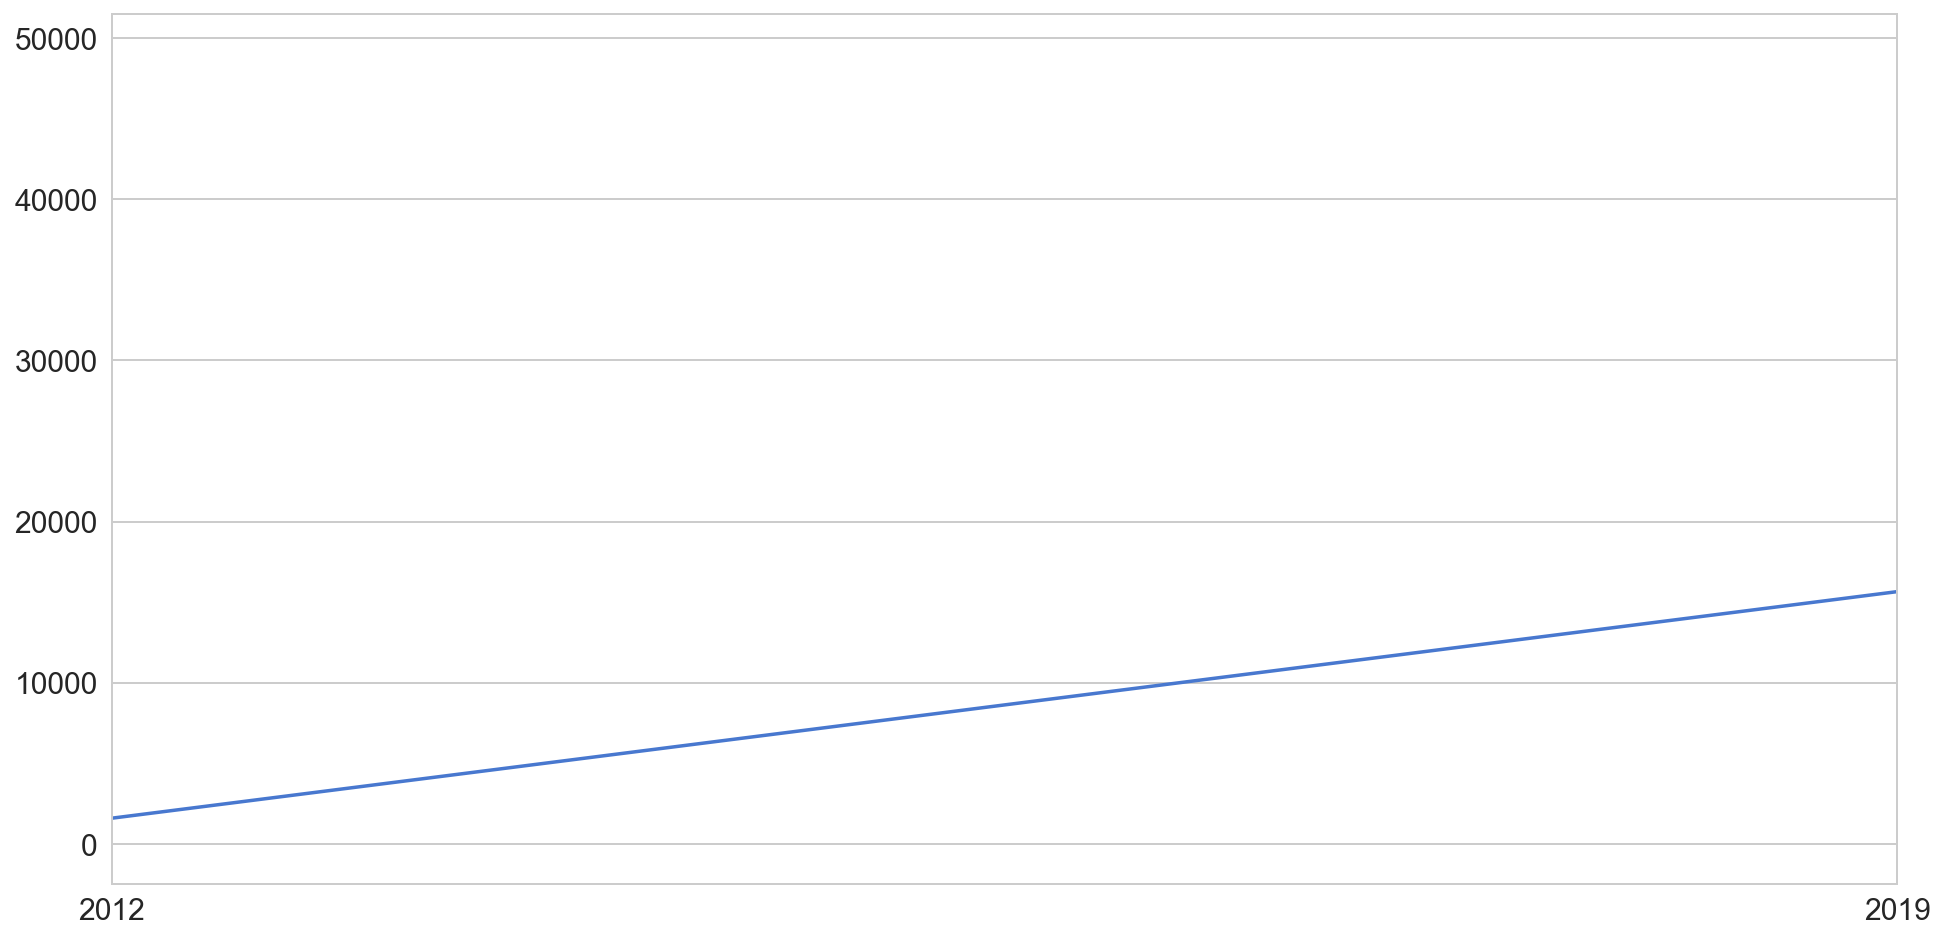

In [14]:
plt.figure(figsize=(16,8))

plt.plot(df1['Seven_Day_ADT'], label='Seven Day ADT')
plt.xlim('2012','2019')

In [15]:
df1['Count_Start_Date'] = pd.to_datetime(df1.Count_Start_Date,format='%Y-%m-%d')
df1.index = df1['Count_Start_Date']

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
data = df1.sort_index(ascending=True, axis=0)

In [17]:
new_data = pd.DataFrame(index=range(0,len(df1)),columns=['Count_Start_Date', 'Seven_Day_ADT'])

In [18]:
for i in range(0,len(data)):
    new_data['Count_Start_Date'][i] = data['Count_Start_Date'][i]
    new_data['Seven_Day_ADT'][i] = data['Seven_Day_ADT'][i]

In [19]:
new_data

,Count_Start_Date,Seven_Day_ADT
0,1900-01-01 00:00:00,7531.57
1,2012-05-25 00:00:00,1603.43
2,2012-07-15 00:00:00,15659.9
3,2012-07-16 00:00:00,5230.86
4,2012-07-16 00:00:00,991.143
5,2012-07-16 00:00:00,2018.57
6,2012-07-16 00:00:00,6702.71
7,2012-07-16 00:00:00,13256.3
8,2012-07-16 00:00:00,16429.1
9,2012-07-16 00:00:00,20923.9


In [20]:
import datetime as dt
new_data['Count_Start_Date'] = pd.to_datetime(new_data['Count_Start_Date'])
new_data['Count_Start_Date']=new_data['Count_Start_Date'].map(dt.datetime.toordinal)

In [21]:
len(new_data)

12431

In [22]:
train = new_data[0:10000]
valid = new_data[10000:11000]

x_train = train.drop('Seven_Day_ADT', axis=1)
y_train = train['Seven_Day_ADT']
x_valid = valid.drop('Seven_Day_ADT', axis=1)
y_valid = valid['Seven_Day_ADT']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

nan

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


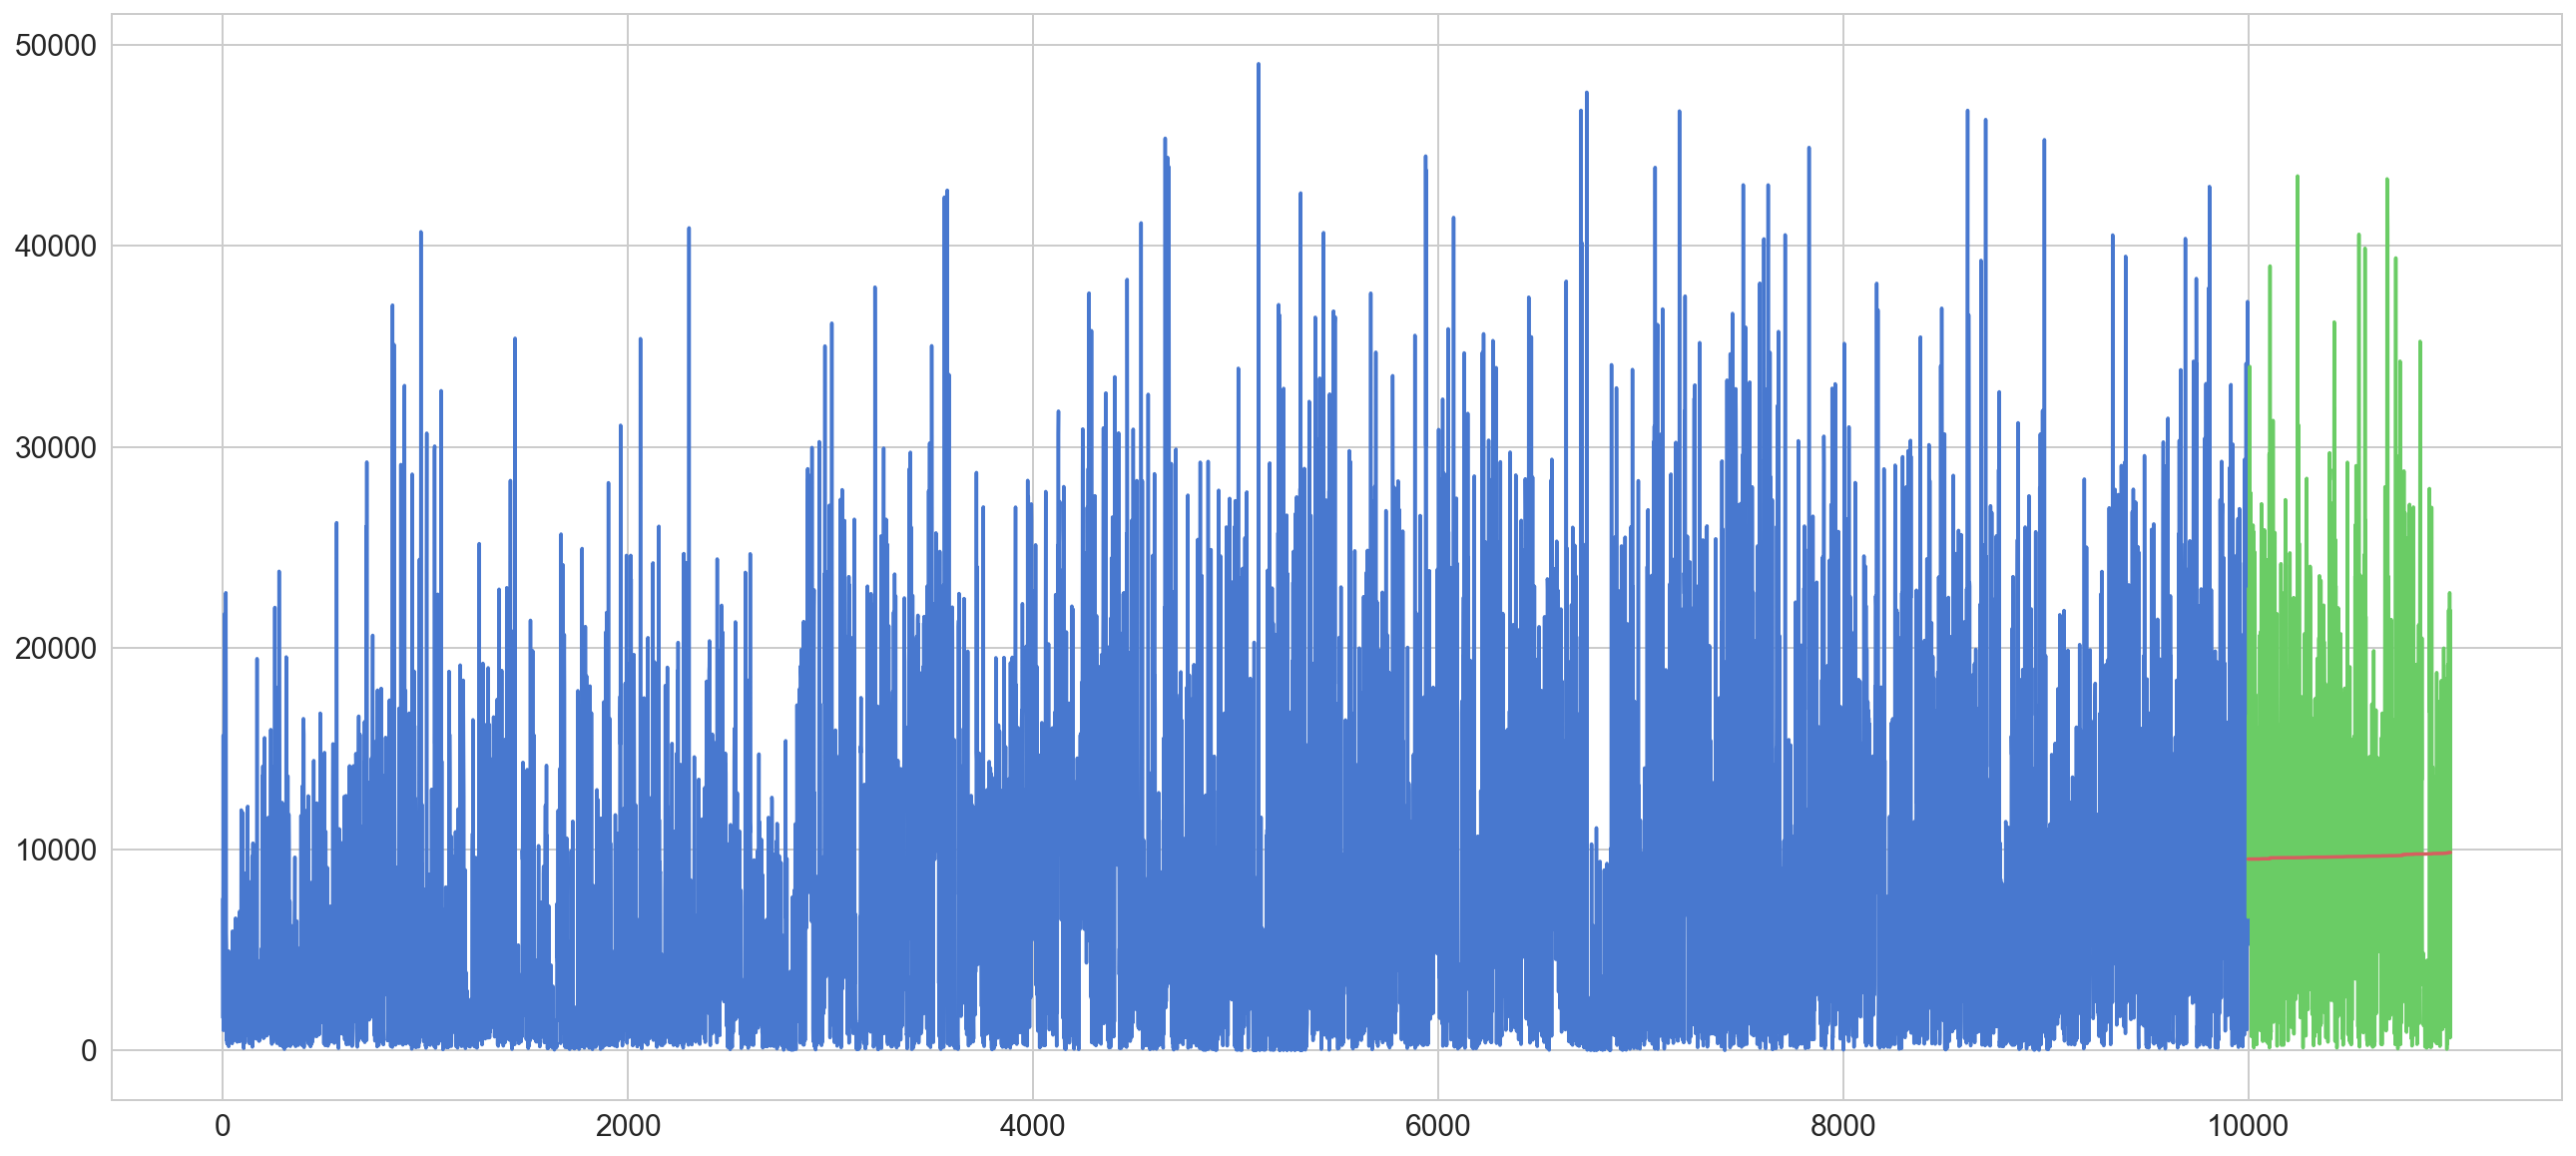

In [65]:
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[10000:11000].index
train.index = new_data[0:10000].index

plt.plot(train['Seven_Day_ADT'])
plt.plot(valid[['Seven_Day_ADT', 'Predictions']])

# Arima